<a href="https://colab.research.google.com/github/guzun0325/pyTorch-Deep-learning/blob/main/2_1_Understand_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


# Generate data

In [ ]:
# y without noises
lstX=[]
lstY=[]
for i in range(5000):
  x1 = np.random.normal(0.1, 0.5) # mean and standard deviation
  x2 = np.random.normal(2, 0.8)
  x3 = np.random.normal(0.5, 0.8)
  x4 = np.random.normal(0.1, 3.5)
  x5 = np.random.normal(5, 0.7)
  x6 = np.random.normal(0.2, 0.3)
  x7 = np.random.normal(9, 0.3)
  y = 0.455*pow(x1,3)+0.111*x2+2.22*pow(x3,4)+0.888*pow(x4,3)+0.222*pow(x5,2)*x6+0.777*pow(x7,2)
  lstX.append([x1, x2, x3, x4, x5, x6, x7])
  lstY.append([y])

In [ ]:
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(np.max(numpyY), np.min(numpyY), np.mean(numpyY), np.std(numpyY))

1923.288186683187 -1377.4467915958444 72.43377219596555 145.815796030216


# Build NN

In [ ]:
MyNet = nn.Sequential(
    nn.Linear(7, 56),
    nn.ReLU(),
    nn.Linear(56, 56),
    nn.ReLU(),
    nn.Linear(56, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=7, out_features=56, bias=True)
  (1): ReLU()
  (2): Linear(in_features=56, out_features=56, bias=True)
  (3): ReLU()
  (4): Linear(in_features=56, out_features=1, bias=True)
)


# Run training-test 20 times

In [ ]:
train_lossLst = []
test_lossLst = []
for i in range(1, 11):
  print("\nTrain-test ", i, end= " ")
  trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  tensorX = torch.FloatTensor(trainX).to(device)
  tensorY = torch.FloatTensor(trainY).to(device)
  torch_dataset = Data.TensorDataset(tensorX, tensorY)
  loader = Data.DataLoader(
      dataset=torch_dataset,
      batch_size=500,
      shuffle=True,
      num_workers=0,    # subprocesses for loading data
  )

  # initialize NN weights
  for name, param in MyNet.named_parameters():
    if(param.requires_grad):
      torch.nn.init.normal_(param, mean=0.0, std=0.02)
  loss_func = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.0003)

  # train NN
  print("epoch", end=": ")
  epoch_lossLst=[]
  for epoch in range(1, 300):
    if(epoch%100 == 0):
      print(epoch, end=",")
    for (batchX, batchY) in loader:
      batchY_hat = MyNet(batchX)
      loss = loss_func(batchY_hat, batchY)
      epoch_lossLst.append(float(loss))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  train_lossLst.append(epoch_lossLst)

  tensorX = torch.FloatTensor(testX).to(device)
  tensorY = torch.FloatTensor(testY).to(device)
  tensorY_hat = MyNet(tensorX)
  loss = loss_func(tensorY, tensorY_hat)
  test_lossLst.append(float(loss))


Train-test  1 epoch: 100,200,
Train-test  2 epoch: 100,200,
Train-test  3 epoch: 100,200,
Train-test  4 epoch: 100,200,
Train-test  5 epoch: 100,200,
Train-test  6 epoch: 100,200,
Train-test  7 epoch: 100,200,
Train-test  8 epoch: 100,200,
Train-test  9 epoch: 100,200,
Train-test  10 epoch: 100,200,

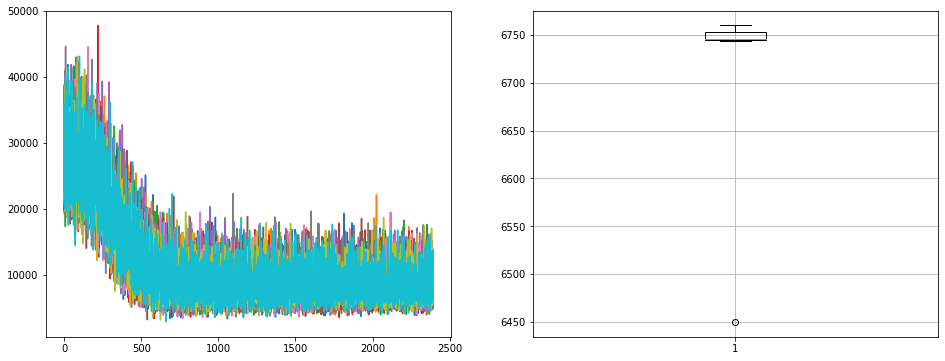

In [ ]:
#take a look at the train loss plot and box plot of test lost
fig=plt.figure(figsize=(16, 6))

fig.add_subplot(1, 2, 1) #1 row, 2 cols
for lst in train_lossLst:
  plt.plot(lst)
plt.xlabel('Input')
plt.ylabel('Loss')

fig.add_subplot(1, 2, 2)
plt.boxplot(test_lossLst)

plt.grid()
plt.show()